<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Чтобы при перезапуске ячеек получать одни и те же рандомные значения

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [5]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [6]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [8]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

Пропусков в данных есть, в столбцах mileage, engine, max_power, torque, seats

In [9]:
duplicates = df_train.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
6994    False
6995    False
6996    False
6997     True
6998     True
Length: 6999, dtype: bool

In [10]:
df_train.loc[df_train.duplicated(), :]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
326             Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
...                                        ...   ...            ...   
6880             Renault Captur 1.5 Diesel RXT  2018        1265000   
6881                  Maruti Ciaz Alpha Diesel  2019        1025000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
326       45000  Diesel      Dealer    Automatic   First Owner  19.33 kmpl   
...         ...     ...         ...          ...           ...         ...   
6880      12000  Diesel  Individual       Manual   First Owner  20.37 kmpl   
6881      32000  Diesel  Individual       Manual   First Owner  28.09 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
326   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
...       ...         ...                  ...    ...  
6880  1461 CC  108.45 bhp       240Nm@ 1750rpm    5.0  
6881  1248 CC   88.50 bhp       200Nm@ 1750rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[985 rows x 13 columns]

In [11]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [12]:
profile

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- самое популярное топливо - Diesel
- год машины - с 2000 по 2020
- крутящий момент torque самый частый - 4000 rpm, 2000 rpm
- уникальных значений seats - 5, вещественный признак можно использовать в качестве категориального

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [13]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

В трейне среднее и медиана по всем столбцу year примерно равно медиане year. В остальных признакаха selling_price, km_driven, seats среднее больше медианы. Это говорит о том, что в данных есть выбросы, поэтому среднее смещенное

In [14]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

В тесте ситуация аналогичная трейну, признак года без выбросов, остальные имееют среднее больше, чем медиана из-за выбросов

In [15]:
df_train.describe(include=object)

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [16]:
df_test.describe(include=object)

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [17]:
y_train = df_train['selling_price']
df_train = df_train.drop('selling_price', axis = 1)
df_train.head()

name  year  km_driven    fuel seller_type  \
0         Maruti Swift Dzire VDI  2014     145500  Diesel  Individual   
1   Skoda Rapid 1.5 TDI Ambition  2014     120000  Diesel  Individual   
2      Hyundai i20 Sportz Diesel  2010     127000  Diesel  Individual   
3         Maruti Swift VXI BSIII  2007     120000  Petrol  Individual   
4  Hyundai Xcent 1.2 VTVT E Plus  2017      45000  Petrol  Individual   

  transmission         owner     mileage   engine   max_power  \
0       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [18]:
duplicates = df_train.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
6994    False
6995    False
6996    False
6997     True
6998     True
Length: 6999, dtype: bool

In [19]:
df_train.loc[df_train.duplicated(), :]

name  year  km_driven    fuel  \
254                   Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                           Maruti Swift VXI  2012      50000  Petrol   
268                     Maruti Swift Dzire VXI  2014      70000  Petrol   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                              Lexus ES 300h  2019      20000  Petrol   
...                                        ...   ...        ...     ...   
6947                    Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner     mileage   engine   max_power  \
254   Individual       Manual   First Owner   18.9 kmpl  1197 CC      82 bhp   
258   Individual       Manual  Second Owner   18.6 kmpl  1197 CC    85.8 bhp   
268   Individual       Manual  Second Owner   19.1 kmpl  1197 CC    85.8 bhp   
324       Dealer    Automatic   First Owner   13.6 kmpl  1999 CC     177 bhp   
325       Dealer    Automatic   First Owner  22.37 kmpl  2487 CC  214.56 bhp   
...          ...          ...           ...         ...      ...         ...   
6947  Individual       Manual  Second Owner   18.0 kmpl   995 CC      62 bhp   
6984  Individual       Manual   First Owner   24.4 kmpl  1498 CC   98.63 bhp   
6989  Individual       Manual   First Owner  26.59 kmpl  1248 CC      74 bhp   
6997  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   
6998  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   

                   torque  seats  
254        114Nm@ 4000rpm    5.0  
258        114Nm@ 4000rpm    5.0  
268        114Nm@ 4000rpm    5.0  
324   430Nm@ 1750-2500rpm    5.0  
325   202Nm@ 3600-5200rpm    5.0  
...                   ...    ...  
6947      90.3Nm@ 4200rpm    5.0  
6984  215Nm@ 1750-3000rpm    5.0  
6989       190Nm@ 2000rpm    5.0  
6997  140Nm@ 1800-3000rpm    5.0  
6998  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 12 columns]

Всего получилось 1159 дубликатов

In [20]:
df_train = df_train.drop_duplicates()

df_train['selling_price'] = y_train
print(df_train.shape)

(5840, 13)


In [21]:
assert df_train.shape == (5840, 13)

In [22]:
df_train = df_train.reset_index()

In [23]:
df_train

index                               name  year  km_driven    fuel  \
0         0             Maruti Swift Dzire VDI  2014     145500  Diesel   
1         1       Skoda Rapid 1.5 TDI Ambition  2014     120000  Diesel   
2         2          Hyundai i20 Sportz Diesel  2010     127000  Diesel   
3         3             Maruti Swift VXI BSIII  2007     120000  Petrol   
4         4      Hyundai Xcent 1.2 VTVT E Plus  2017      45000  Petrol   
...     ...                                ...   ...        ...     ...   
5835   6992            Hyundai Santro Xing GLS  2008     191000  Petrol   
5836   6993  Maruti Wagon R VXI BS IV with ABS  2013      50000  Petrol   
5837   6994                  Hyundai i20 Magna  2013     110000  Petrol   
5838   6995              Hyundai Verna CRDi SX  2007     119000  Diesel   
5839   6996             Maruti Swift Dzire ZDi  2009     120000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
0     Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1     Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2     Individual       Manual           First Owner   23.0 kmpl  1396 CC   
3     Individual       Manual           First Owner   16.1 kmpl  1298 CC   
4     Individual       Manual           First Owner  20.14 kmpl  1197 CC   
...          ...          ...                   ...         ...      ...   
5835  Individual       Manual           First Owner  17.92 kmpl  1086 CC   
5836  Individual       Manual          Second Owner   18.9 kmpl   998 CC   
5837  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
5838  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
5839  Individual       Manual           First Owner   19.3 kmpl  1248 CC   

       max_power                     torque  seats  selling_price  
0         74 bhp             190Nm@ 2000rpm    5.0         450000  
1     103.52 bhp        250Nm@ 1500-2500rpm    5.0         370000  
2         90 bhp   22.4 kgm at 1750-2750rpm    5.0         225000  
3       88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0         130000  
4      81.86 bhp          113.75nm@ 4000rpm    5.0         440000  
...          ...                        ...    ...            ...  
5835    62.1 bhp            96.1Nm@ 3000rpm    5.0         120000  
5836    67.1 bhp              90Nm@ 3500rpm    5.0         260000  
5837   82.85 bhp           113.7Nm@ 4000rpm    5.0         320000  
5838     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0         135000  
5839    73.9 bhp             190Nm@ 2000rpm    5.0         382000  

[5840 rows x 14 columns]

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5840 non-null   int64  
 1   name           5840 non-null   object 
 2   year           5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   object 
 9   engine         5654 non-null   object 
 10  max_power      5657 non-null   object 
 11  torque         5653 non-null   object 
 12  seats          5654 non-null   float64
 13  selling_price  5840 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 638.9+ KB


In [25]:
df_train.head()

index                           name  year  km_driven    fuel seller_type  \
0      0         Maruti Swift Dzire VDI  2014     145500  Diesel  Individual   
1      1   Skoda Rapid 1.5 TDI Ambition  2014     120000  Diesel  Individual   
2      2      Hyundai i20 Sportz Diesel  2010     127000  Diesel  Individual   
3      3         Maruti Swift VXI BSIII  2007     120000  Petrol  Individual   
4      4  Hyundai Xcent 1.2 VTVT E Plus  2017      45000  Petrol  Individual   

  transmission         owner     mileage   engine   max_power  \
0       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  selling_price  
0            190Nm@ 2000rpm    5.0         450000  
1       250Nm@ 1500-2500rpm    5.0         370000  
2  22.4 kgm at 1750-2750rpm    5.0         225000  
3     11.5@ 4,500(kgm@ rpm)    5.0         130000  
4         113.75nm@ 4000rpm    5.0         440000

In [26]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: str(x).strip().split()[0])
df_train['mileage'] = df_train['mileage'].astype(float)

In [27]:
df_train['engine'] = df_train['engine'].apply(lambda x: str(x).strip().split()[0])
df_train['engine'] = df_train['engine'].astype(float)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5840 non-null   int64  
 1   name           5840 non-null   object 
 2   year           5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   float64
 9   engine         5654 non-null   float64
 10  max_power      5657 non-null   object 
 11  torque         5653 non-null   object 
 12  seats          5654 non-null   float64
 13  selling_price  5840 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 638.9+ KB


In [28]:
df_train['max_power'] = df_train['max_power'].apply(lambda x: str(x).strip().split()[0])
df_train['max_power'] = df_train['max_power'].apply(lambda x: str(0) if x == 'bhp' else x)
df_train['max_power'] = df_train['max_power'].astype(float)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5840 non-null   int64  
 1   name           5840 non-null   object 
 2   year           5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   float64
 9   engine         5654 non-null   float64
 10  max_power      5657 non-null   float64
 11  torque         5653 non-null   object 
 12  seats          5654 non-null   float64
 13  selling_price  5840 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 638.9+ KB


In [29]:
df_train['torque'] = df_train['torque'].replace(np.nan, None)

In [30]:
import re

def extract_nums(x):
    if isinstance(x, str):
        return [float(num.replace(',', '').replace('.', '.')) for num in re.findall(r'\d+(?:\.\d+)?(?:,\d{3})*', x)]
    else:
        return x

In [31]:
def torque_calc(x):
    if x is None:
        x_torque = 0
        x_max_torque_rpm = 0

    else:
        x = x.lower()
        x_extract = extract_nums(x)
        if 'nm' in x and 'kgm' not in x:
            x_torque = float(x_extract[0])
        elif 'kgm' in x and 'nm' not in x:
            x_torque = round(float(x_extract[0]) * 9.80665,1)
        else:
            x_torque = round(float(x_extract[0]),1)

        if 'rpm' in x :
            x_max_torque_rpm = float(x_extract[-1])
        else:
            x_max_torque_rpm = 0

    return x_torque, x_max_torque_rpm

In [32]:
torque_tuple = df_train['torque'].apply(lambda x: torque_calc(x))

torque = []
max_torque_rpm = []
for elem in torque_tuple:
    torque.append(elem[0])
    max_torque_rpm.append(elem[1])

print(len(torque))
print(len(max_torque_rpm))
print(torque[:5])
print(max_torque_rpm[:5])

5840
5840
[190.0, 250.0, 219.7, 112.8, 113.75]
[2000.0, 2500.0, 2750.0, 4500.0, 4000.0]


In [33]:
df_train['torque'].head()

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2    22.4 kgm at 1750-2750rpm
3       11.5@ 4,500(kgm@ rpm)
4           113.75nm@ 4000rpm
Name: torque, dtype: object

In [34]:
df_train['torque'] = torque
df_train['max_torque_rpm'] = max_torque_rpm
df_train.head()

index                           name  year  km_driven    fuel seller_type  \
0      0         Maruti Swift Dzire VDI  2014     145500  Diesel  Individual   
1      1   Skoda Rapid 1.5 TDI Ambition  2014     120000  Diesel  Individual   
2      2      Hyundai i20 Sportz Diesel  2010     127000  Diesel  Individual   
3      3         Maruti Swift VXI BSIII  2007     120000  Petrol  Individual   
4      4  Hyundai Xcent 1.2 VTVT E Plus  2017      45000  Petrol  Individual   

  transmission         owner  mileage  engine  max_power  torque  seats  \
0       Manual   First Owner    23.40  1248.0      74.00  190.00    5.0   
1       Manual  Second Owner    21.14  1498.0     103.52  250.00    5.0   
2       Manual   First Owner    23.00  1396.0      90.00  219.70    5.0   
3       Manual   First Owner    16.10  1298.0      88.20  112.80    5.0   
4       Manual   First Owner    20.14  1197.0      81.86  113.75    5.0   

   selling_price  max_torque_rpm  
0         450000          2000.0  
1         370000          2500.0  
2         225000          2750.0  
3         130000          4500.0  
4         440000          4000.0

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [36]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [37]:
df_test['mileage'] = df_test['mileage'].apply(lambda x: str(x).strip().split()[0])
df_test['mileage'] = df_test['mileage'].astype(float)
df_test['engine'] = df_test['engine'].apply(lambda x: str(x).strip().split()[0])
df_test['engine'] = df_test['engine'].astype(float)
df_test['max_power'] = df_test['max_power'].apply(lambda x: str(x).strip().split()[0])
df_test['max_power'] = df_test['max_power'].apply(lambda x: str(0) if x == 'bhp' else x)
df_test['max_power'] = df_test['max_power'].astype(float)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    float64
 9   engine         981 non-null    float64
 10  max_power      981 non-null    float64
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 101.7+ KB


In [38]:
df_test['torque'] = df_test['torque'].replace(np.nan, None)

In [39]:
torque_tuple = df_test['torque'].apply(lambda x: torque_calc(x))

torque = []
max_torque_rpm = []
for elem in torque_tuple:
    torque.append(elem[0])
    max_torque_rpm.append(elem[1])

print(len(torque))
print(len(max_torque_rpm))
print(torque[:5])
print(max_torque_rpm[:5])

1000
1000
[260.0, 260.0, 172.0, 200.0, 96.0]
[2200.0, 2750.0, 4300.0, 1750.0, 3000.0]


In [40]:
df_test['torque'].head()

0    260 Nm at 1800-2200 rpm
1        260Nm@ 1500-2750rpm
2             172Nm@ 4300rpm
3             200Nm@ 1750rpm
4       96  Nm at 3000  rpm 
Name: torque, dtype: object

In [41]:
df_test['torque'] = torque
df_test['max_torque_rpm'] = max_torque_rpm
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner  mileage  engine  max_power  \
0  Diesel  Individual       Manual   First Owner     14.0  2498.0      112.0   
1  Diesel  Individual       Manual   First Owner     21.5  1497.0      108.5   
2  Petrol  Individual    Automatic   First Owner     12.9  1799.0      130.0   
3  Diesel  Individual       Manual   First Owner     25.1  1498.0       98.6   
4  Petrol  Individual       Manual  Second Owner     16.5  1172.0       65.0   

   torque  seats  max_torque_rpm  
0   260.0    7.0          2200.0  
1   260.0    5.0          2750.0  
2   172.0    5.0          4300.0  
3   200.0    5.0          1750.0  
4    96.0    5.0          3000.0

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`


In [42]:
df_train.isnull().sum()

index               0
name                0
year                0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           186
engine            186
max_power         183
torque              0
seats             186
selling_price       0
max_torque_rpm      0
dtype: int64

In [43]:
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median())
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())

In [44]:
df_train['mileage'] = df_train['mileage'].fillna(df_train['mileage'].median())

In [45]:
df_train.isnull().sum()

index             0
name              0
year              0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
selling_price     0
max_torque_rpm    0
dtype: int64

In [46]:
df_test.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage           19
engine            19
max_power         19
torque             0
seats             19
max_torque_rpm     0
dtype: int64

In [47]:
df_test['engine'] = df_test['engine'].fillna(df_train['engine'].median())
df_test['max_power'] = df_test['max_power'].fillna(df_train['max_power'].median())
df_test['seats'] = df_test['seats'].fillna(df_train['seats'].median())
df_test['mileage'] = df_test['mileage'].fillna(df_train['mileage'].median())
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

Да, могли бы использовать и среднее, но лучше заполнять пропуски медианой. Поскольку среднее значение чувствительно к выбросам, то оно может "смещать" данные в сторону выбросов, тем самым зашумлять их

Медиану для двух выборок нужно считать по выборке трейна, как и любую статистику, чтобы не переобучиться под тест

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [48]:
df_train['engine'].unique()

array([1248., 1498., 1396., 1298., 1197., 1061.,  796., 1364., 1399.,
       1461.,  993., 1198.,  998., 1591., 2179., 1368., 1497., 2982.,
       2494., 2143., 2477., 2755., 1968., 1196., 1373., 1598., 1998.,
       1086., 1194., 1798., 1405., 1582.,  999., 2487., 1999., 2987.,
       1995., 1451., 1969., 2967., 2497., 1797., 1991., 2362., 1493.,
       1341., 1199., 1794., 1193., 2696.,  799., 1495., 1186., 1047.,
       2498., 2523., 1120.,  624., 1496., 1984., 2354.,  793., 1799.,
        936., 1956.,  814., 1997., 1948., 2997., 1172., 2489., 2499.,
       2609., 2953., 1150., 1994., 1388., 1462., 2956., 1527., 2199.,
        995., 1599., 2993., 1586., 1390.,  909., 2393., 3198., 1499.,
       3604., 1339., 2092., 1595., 2496., 1596., 1597., 2596., 2148.,
       1299., 1590., 2231., 2694., 2200., 1795., 1896., 1796., 1422.,
       1489., 2359., 2197., 2999., 1781., 2650., 1343., 2446., 3498.,
       2198., 2776., 1950.])

In [49]:
df_train['engine'] = df_train['engine'].astype(int)

In [50]:
df_train['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [51]:
df_train['seats'] = df_train['seats'].astype(int)

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           5840 non-null   int64  
 1   name            5840 non-null   object 
 2   year            5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int64  
 13  selling_price   5840 non-null   int64  
 14  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 684.5+ KB


Seats можно рассматривать как категориальный признак, поскольку у нас есть только 9 уникальных значений, типов этой переменной для всех записей (около 6 тысяч строк в трейне

In [53]:
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   int64  
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   int64  
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 109.5+ KB


### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [54]:
df_train.describe()

index         year     km_driven      mileage       engine  \
count  5840.000000  5840.000000  5.840000e+03  5840.000000  5840.000000   
mean   3393.259075  2013.428425  7.395224e+04    19.430841  1429.448973   
std    2037.354489     4.095622  6.007114e+04     3.985973   485.662834   
min       0.000000  1983.000000  1.000000e+00     0.000000   624.000000   
25%    1632.750000  2011.000000  3.900000e+04    16.950000  1197.000000   
50%    3310.500000  2014.000000  7.000000e+04    19.370000  1248.000000   
75%    5150.250000  2017.000000  1.000000e+05    22.300000  1498.000000   
max    6996.000000  2020.000000  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  selling_price  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000   5.840000e+03     5840.000000  
mean     87.892354   170.234844     5.426712   5.229601e+05     2937.878082  
std      31.661223   111.496261     0.982344   5.354320e+05     1071.030517  
min       0.000000     0.000000     2.000000   2.999900e+04        0.000000  
25%      68.000000   108.000000     5.000000   2.500000e+05     2200.000000  
50%      81.860000   160.000000     5.000000   4.050000e+05     2800.000000  
75%      99.000000   200.100000     5.000000   6.400000e+05     4000.000000  
max     400.000000  1863.300000    14.000000   1.000000e+07    21800.000000

Описательные статистики данных могли немного измениться относительно исходных, посколько мы заполнили пропуски медианами, но глобальная зависимость осталась преженей. Если бы мы заполняли пропуски средними, но распределение могла значительно измениться, что зашумило бы исходные данные

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [55]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

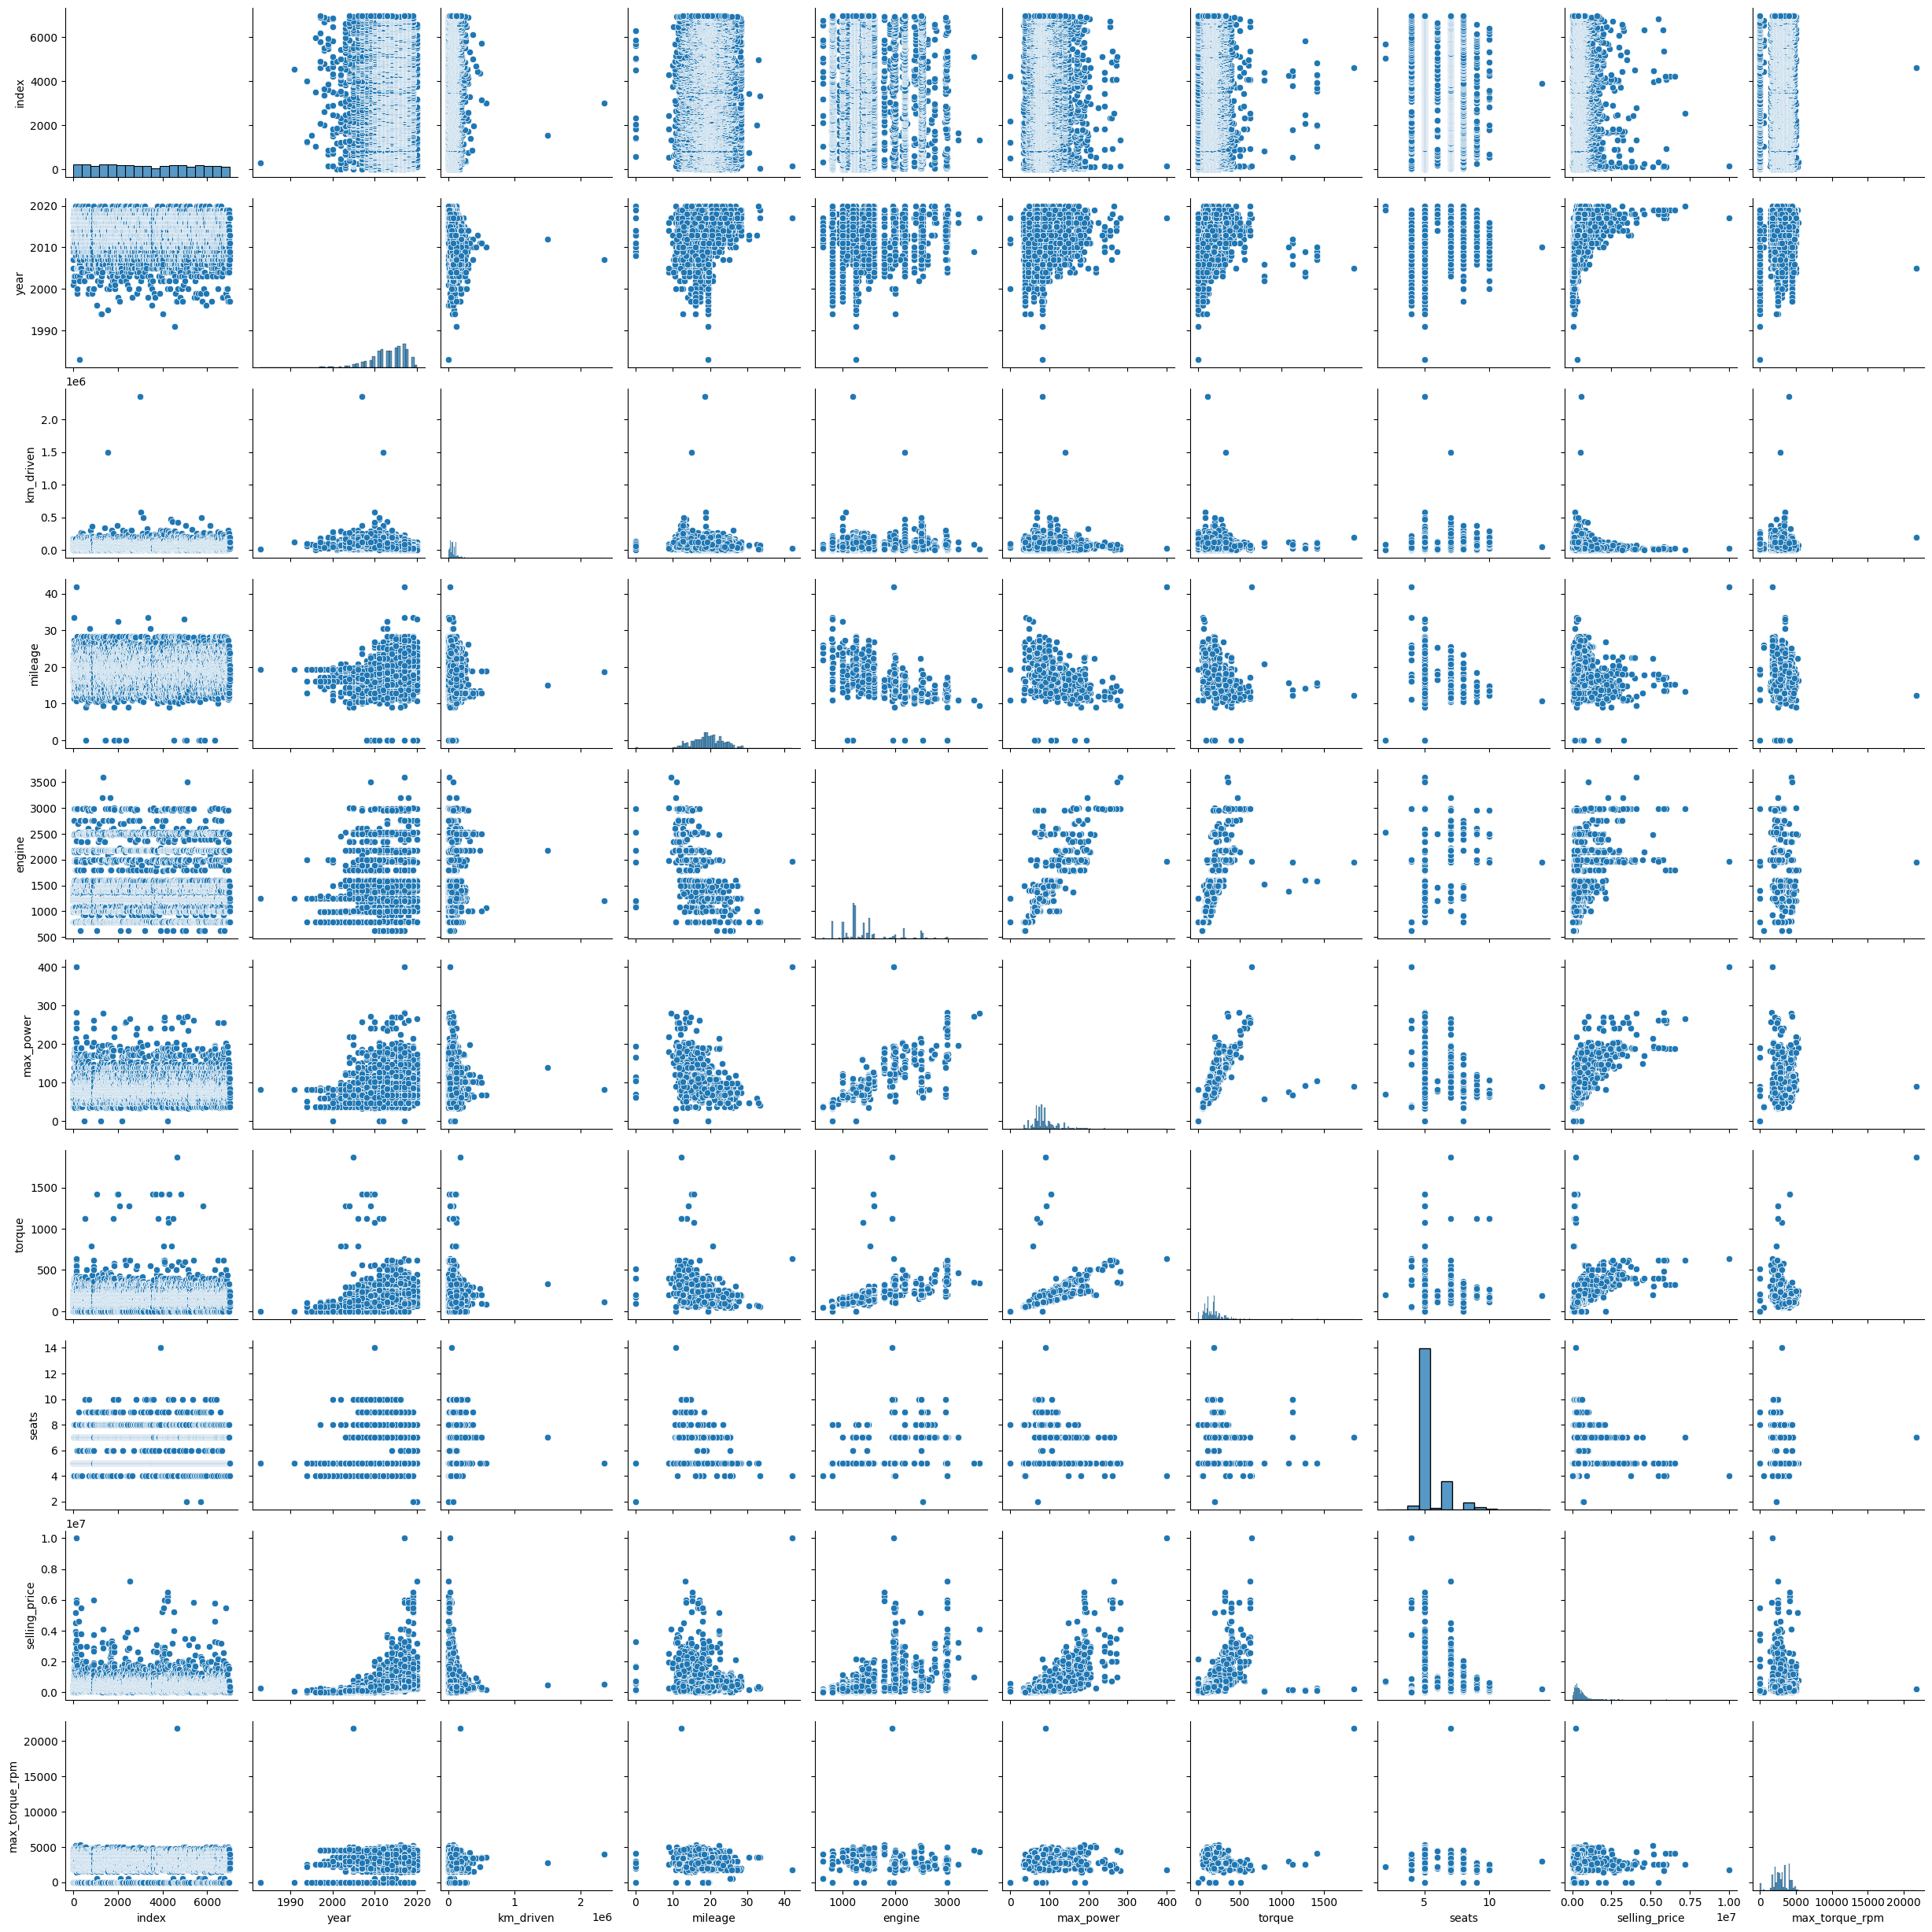

In [56]:
sns.pairplot(df_train)
plt.show()

На графиках видна линейная связь таргетовой переменой цены продажи(selling_price) с признаками torque, max_power, engine. 

Также линейная зависимость прослеживается между признаками torque и max_power, torque и egine. Скорее всего они будут сильно скоррелированы между собой. Хорошо видная лин.зависимость между max_power и engine. Исходя из логических соображений двигатель и максимальная мощность также связаны, так что лин. зависимость в рамках здравого смысла

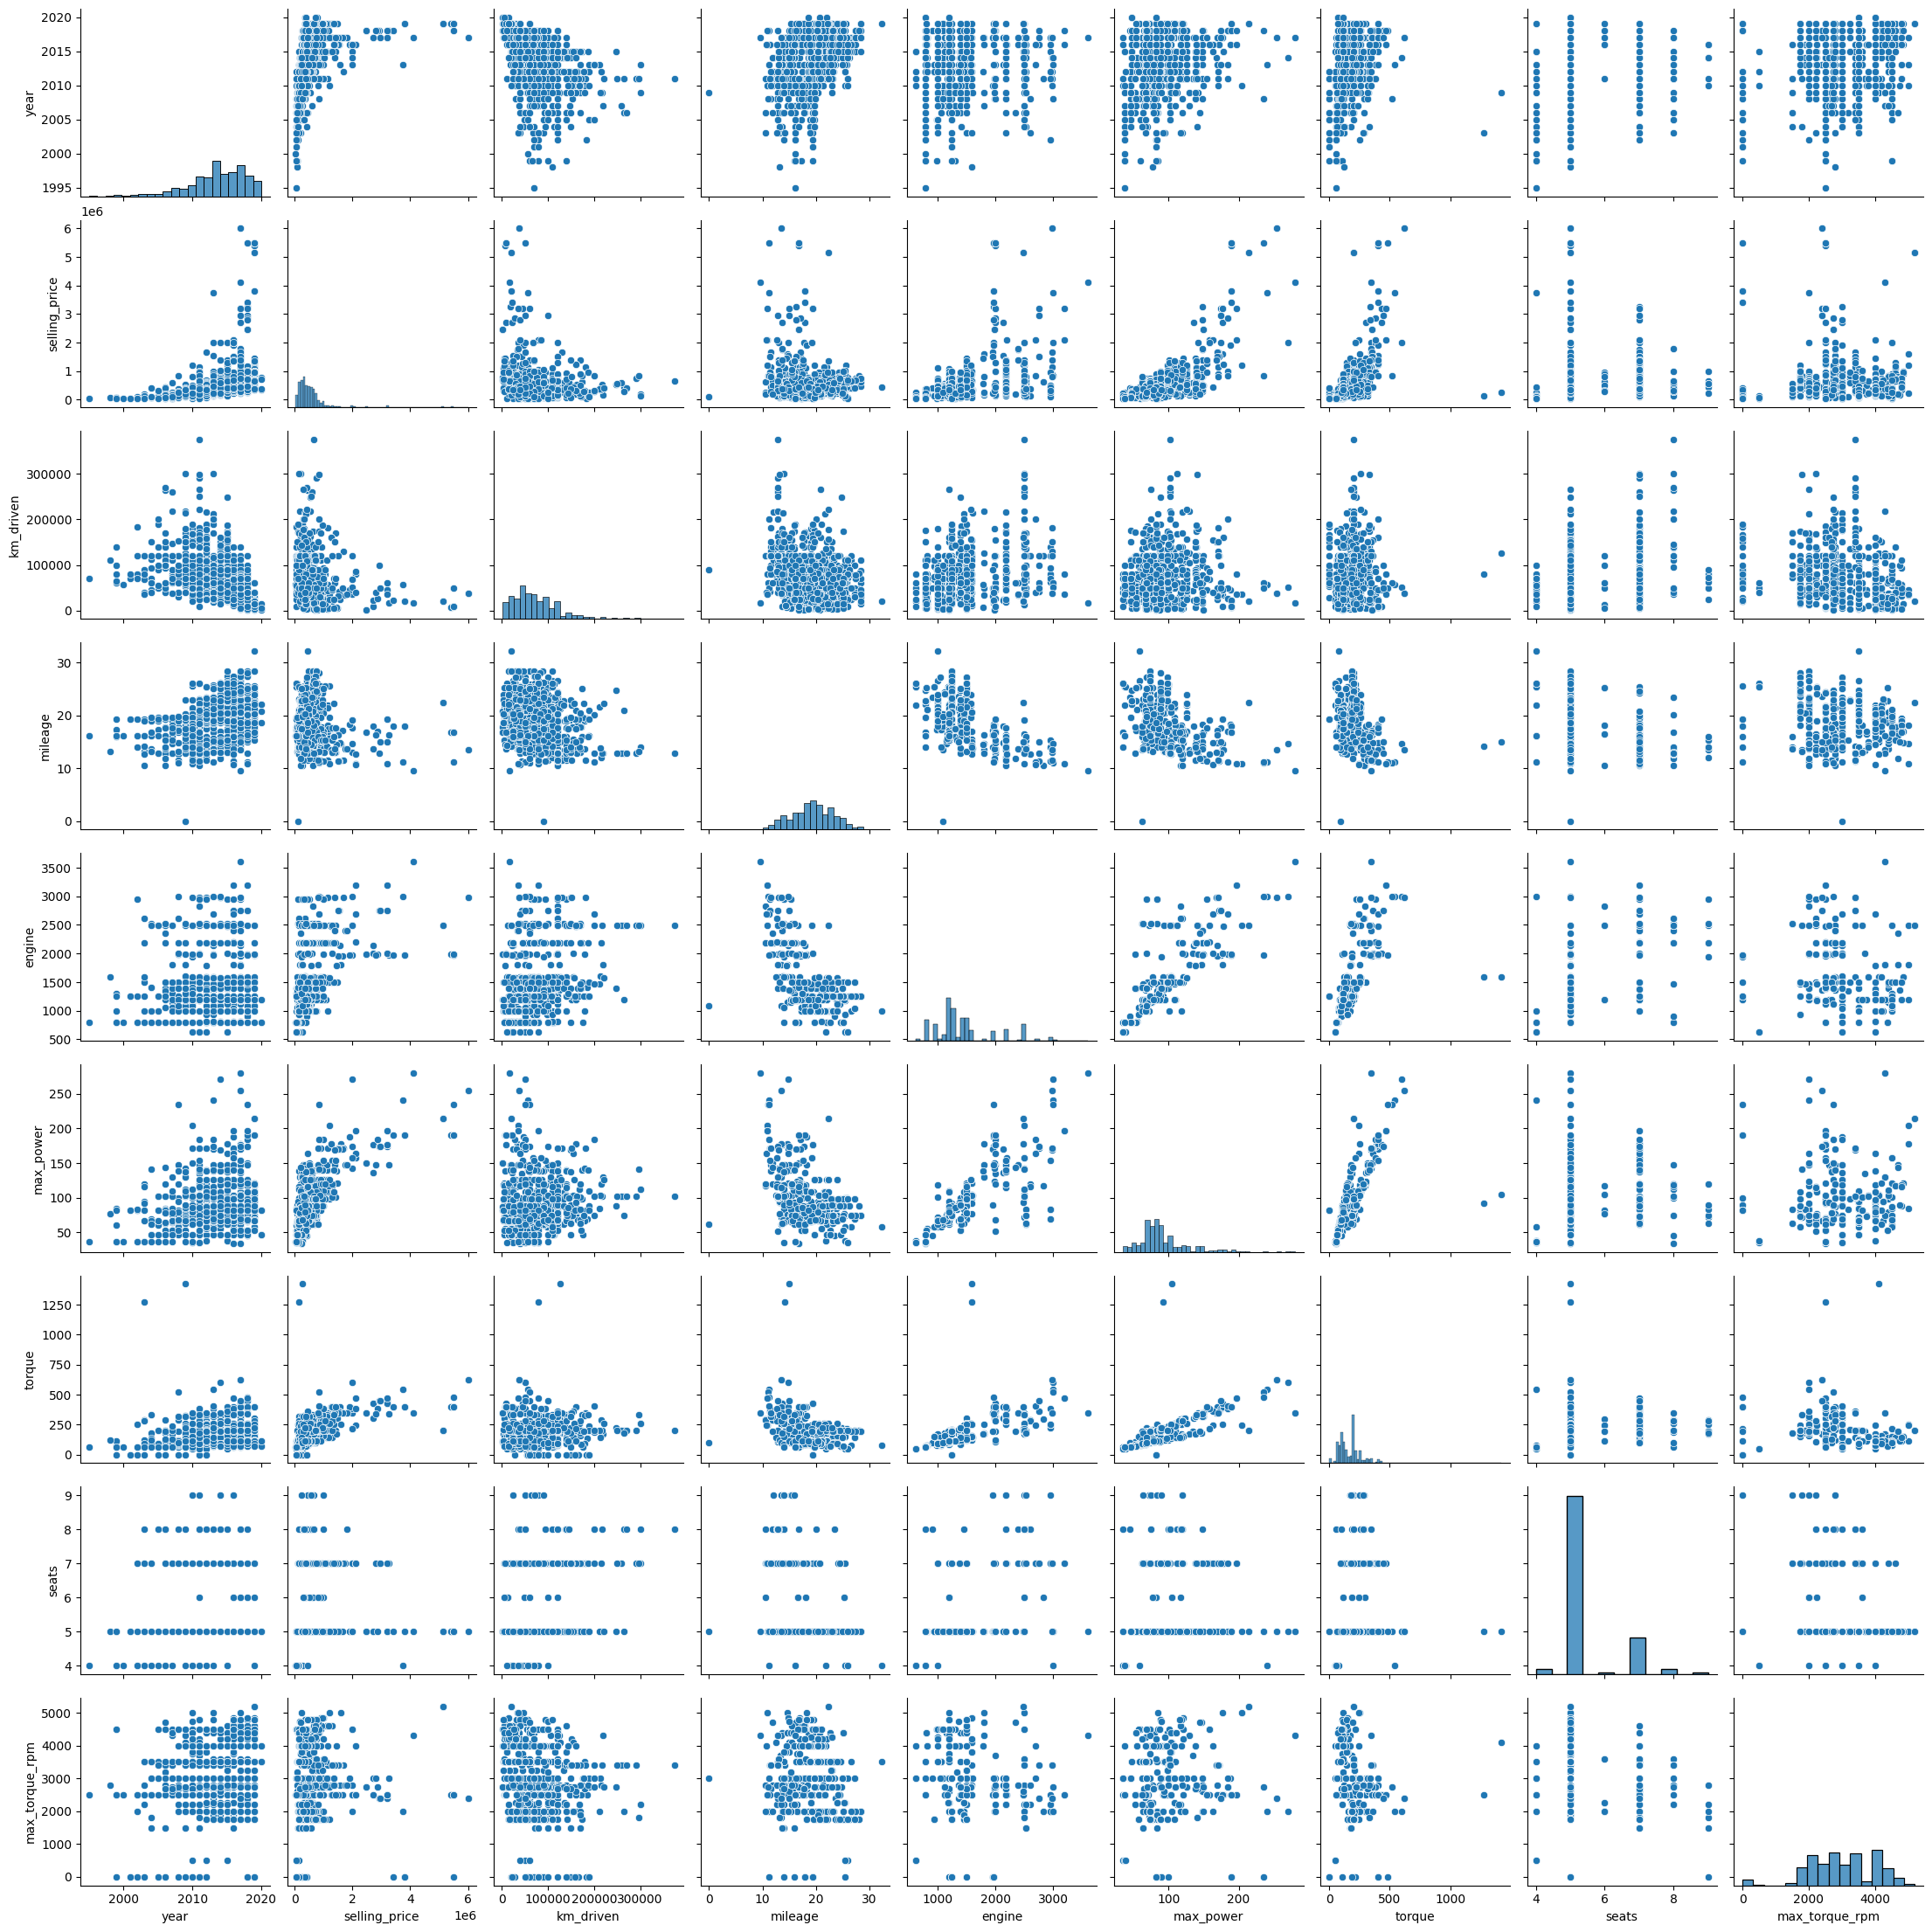

In [57]:
sns.pairplot(df_test)
plt.show()

В тестовых данных видим идентичные зависимости, как и в трейне, поскольку данные в тесте и в трейне должны быть одного распределения. Да, данные похожи

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

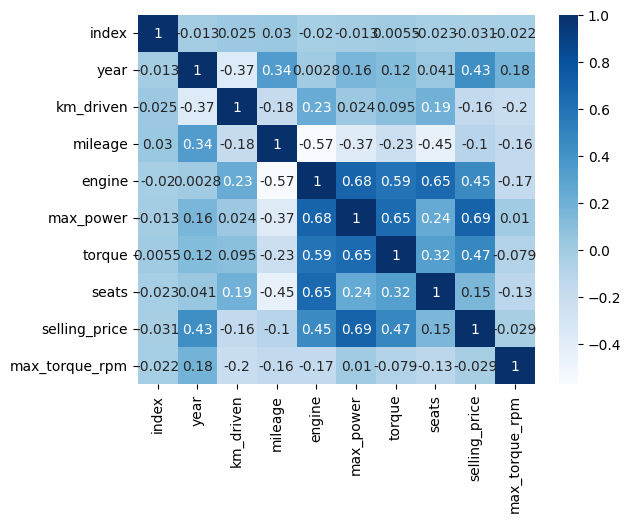

In [58]:
corr = df_train.corr(numeric_only=True) # матрица корреляций

sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

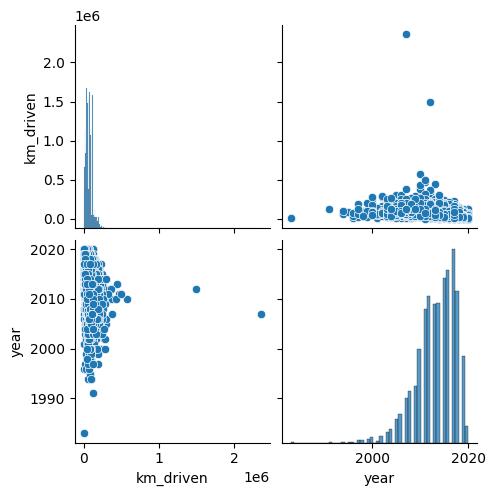

In [59]:
sns.pairplot(df_train[['km_driven', 'year']])
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1) Наименее скорелированные признаки это год year и двигатель engine, корреляция 0,0028  
2) Сильная положительная лин.зависимость наблюдается между признаками:
       - engine и max_power, corr = 0.68
       - engine и torque, corr = 0.59
       - engine и seats, corr = 0.65
       - engine и selling_price(целевая переменная), corr = 0.45
       - mileage vs year, cor = 0.34

   Отрциательная корреляция между признакми, обратная линейная зависимостьЖ
       - engine vs mileage, corr = -0.57. То есть чем больше расход топлива, тем меньше engine
       - mileage vs seats, corr = -0.45
       - mileage vs max_power, corr = -0.37
       - year vs km_driven, corr = -0.37
   
   Положительная корреляция целевой переменной selling price и признаками, лин.зависимость:
       - selling_price vs year, corr = 0.43
       - selling_price vs engine, corr = 0.45
       - selling_price vs max_power, corr = 0.69
       - selling_price vs torque, corr = 0.47
   
4) Коррекляция между годом и пройденными километрами отрциательная и довольно большая, -0.37. В принципе можем говорить об обратной зависимости данных, если судить по корреляции (НО НА ГРАФИКАХ ЕЕ НЕТ, ПОЧЕМУ????)

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [60]:
import numpy as np

In [61]:
def spearman_correlation(x, y):
    rank_x = np.argsort(np.argsort(x)) + 1
    rank_y = np.argsort(np.argsort(y)) + 1
    n = len(x)
    
    d_squared = (rank_x - rank_y) ** 2
    rho = 1 - (6 * sum(d_squared)) / (n * (n**2 - 1))
    
    return rho

In [62]:
def build_spearman_corr_matrix(df):
    columns = df.columns
    corr_matrix = np.zeros((len(columns), len(columns)))
    
    for i in range(len(columns)):
        for j in range(i, len(columns)):
            col_i = df[columns[i]]
            col_j = df[columns[j]]
            
            corr = round(spearman_correlation(col_i, col_j),2)
            corr_matrix[i][j] = corr
            corr_matrix[j][i] = corr
    
    return pd.DataFrame(corr_matrix, index=columns, columns=columns)

In [63]:
corr_matrix = build_spearman_corr_matrix(df_train)
corr_matrix

index  name  year  km_driven  fuel  seller_type  transmission  \
index            1.00 -0.01 -0.01       0.03 -0.21        -0.49         -0.48   
name            -0.01  1.00 -0.03       0.09 -0.10        -0.00          0.00   
year            -0.01 -0.03  1.00      -0.57 -0.02        -0.05         -0.07   
km_driven        0.03  0.09 -0.57       1.00 -0.31         0.05          0.05   
fuel            -0.21 -0.10 -0.02      -0.31  1.00         0.13          0.09   
seller_type     -0.49 -0.00 -0.05       0.05  0.13         1.00          0.71   
transmission    -0.48  0.00 -0.07       0.05  0.09         0.71          1.00   
owner           -0.21 -0.00 -0.42       0.31  0.08         0.20          0.16   
mileage          0.03  0.02  0.34      -0.20 -0.10         0.00          0.08   
engine           0.00  0.00 -0.04       0.30 -0.53        -0.07         -0.12   
max_power       -0.00 -0.03  0.17       0.04 -0.27        -0.09         -0.18   
torque           0.02  0.01  0.16       0.20 -0.62        -0.08         -0.13   
seats           -0.39  0.05  0.05       0.11 -0.14         0.36          0.37   
selling_price   -0.01 -0.00  0.71      -0.30 -0.30        -0.11         -0.17   
max_torque_rpm  -0.03 -0.08  0.14      -0.33  0.61         0.02         -0.03   

                owner  mileage  engine  max_power  torque  seats  \
index           -0.21     0.03    0.00      -0.00    0.02  -0.39   
name            -0.00     0.02    0.00      -0.03    0.01   0.05   
year            -0.42     0.34   -0.04       0.17    0.16   0.05   
km_driven        0.31    -0.20    0.30       0.04    0.20   0.11   
fuel             0.08    -0.10   -0.53      -0.27   -0.62  -0.14   
seller_type      0.20     0.00   -0.07      -0.09   -0.08   0.36   
transmission     0.16     0.08   -0.12      -0.18   -0.13   0.37   
owner            1.00    -0.15    0.03      -0.06   -0.06   0.12   
mileage         -0.15     1.00   -0.43      -0.31   -0.16  -0.30   
engine           0.03    -0.43    1.00       0.71    0.81   0.35   
max_power       -0.06    -0.31    0.71       1.00    0.75   0.20   
torque          -0.06    -0.16    0.81       0.75    1.00   0.29   
seats            0.12    -0.30    0.35       0.20    0.29   1.00   
selling_price   -0.33     0.03    0.46       0.61    0.61   0.22   
max_torque_rpm  -0.08    -0.18   -0.33      -0.01   -0.36  -0.10   

                selling_price  max_torque_rpm  
index                   -0.01           -0.03  
name                    -0.00           -0.08  
year                     0.71            0.14  
km_driven               -0.30           -0.33  
fuel                    -0.30            0.61  
seller_type             -0.11            0.02  
transmission            -0.17           -0.03  
owner                   -0.33           -0.08  
mileage                  0.03           -0.18  
engine                   0.46           -0.33  
max_power                0.61           -0.01  
torque                   0.61           -0.36  
seats                    0.22           -0.10  
selling_price            1.00           -0.05  
max_torque_rpm          -0.05            1.00

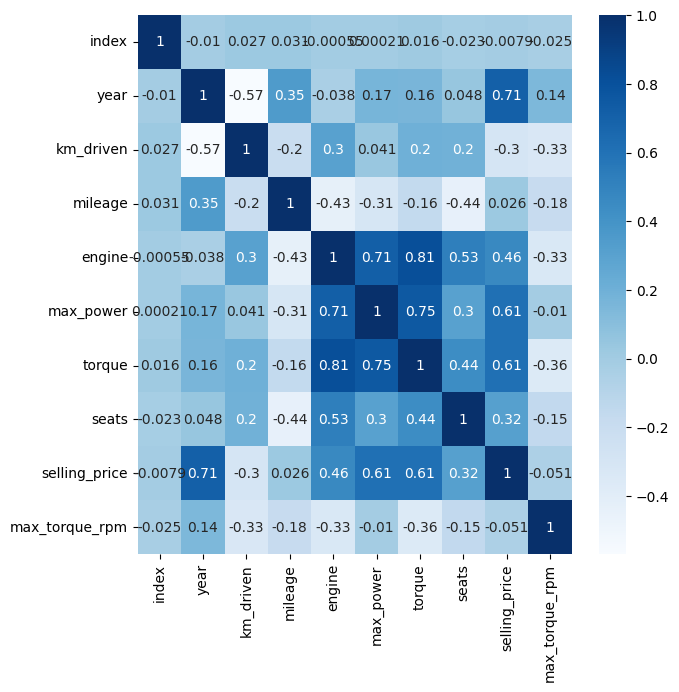

In [64]:
corr = df_train.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(7,7))

sns.heatmap(corr, cmap="Blues", annot=True);

Результаты ручной реализации совпадают с бибилиотечной. В прицнипе все положительные корреляции увеличились. 

In [65]:
!pip install phik -q

interval columns not set, guessing: ['index', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'selling_price', 'max_torque_rpm']


/home/yana/miniconda3/lib/python3.12/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


<Axes: >

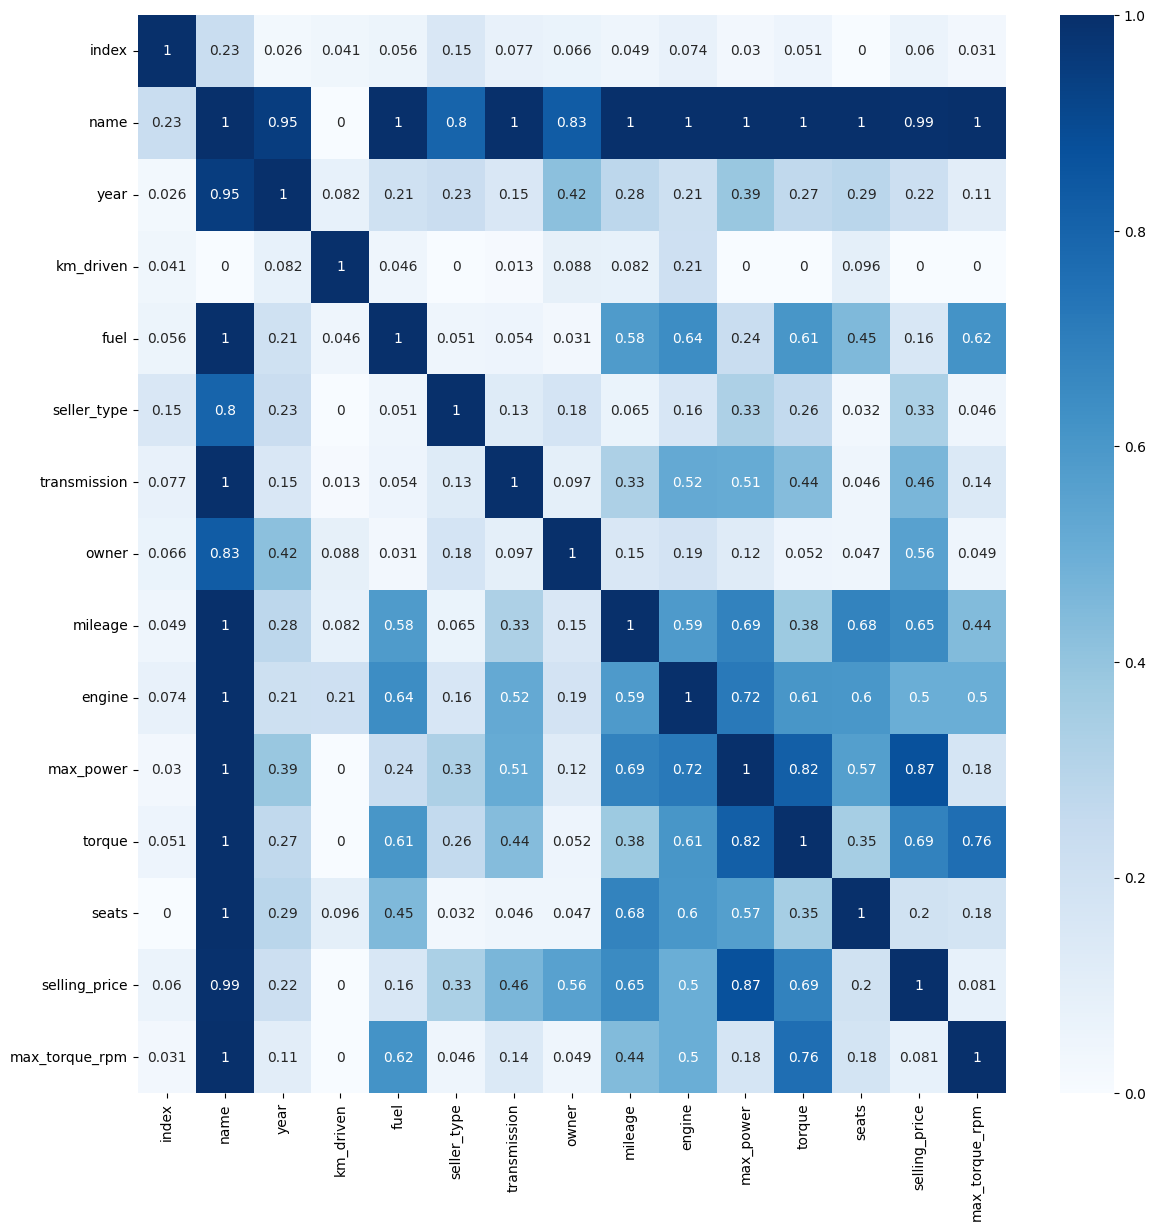

In [66]:
import phik

plt.figure(figsize=(14,14))

ph = df_train.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

Используя phik, мы можем посчитать корреляци между категориальными признаками и числовыми. Из новых зависимостей:
    - fuel vs mileage, engine, torque, max_torque_rpm
    - transmission vs engine, max_power, selling_price(целевая переменная!)
    - name vs все признаки, кроме km_driven, index. (ПОЧЕМУ ТАК?)
    - owner vs year. Видимо в разные года преимущественно продавали определенные владельцы

In [67]:
df_train.head()

index                           name  year  km_driven    fuel seller_type  \
0      0         Maruti Swift Dzire VDI  2014     145500  Diesel  Individual   
1      1   Skoda Rapid 1.5 TDI Ambition  2014     120000  Diesel  Individual   
2      2      Hyundai i20 Sportz Diesel  2010     127000  Diesel  Individual   
3      3         Maruti Swift VXI BSIII  2007     120000  Petrol  Individual   
4      4  Hyundai Xcent 1.2 VTVT E Plus  2017      45000  Petrol  Individual   

  transmission         owner  mileage  engine  max_power  torque  seats  \
0       Manual   First Owner    23.40    1248      74.00  190.00      5   
1       Manual  Second Owner    21.14    1498     103.52  250.00      5   
2       Manual   First Owner    23.00    1396      90.00  219.70      5   
3       Manual   First Owner    16.10    1298      88.20  112.80      5   
4       Manual   First Owner    20.14    1197      81.86  113.75      5   

   selling_price  max_torque_rpm  
0         450000          2000.0  
1         370000          2500.0  
2         225000          2750.0  
3         130000          4500.0  
4         440000          4000.0

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [68]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [69]:
numeric_only = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

In [70]:
y_train = df_train['selling_price']
X_train = df_train[numeric_only]

In [68]:
assert X_train.shape == (5840, 8)

In [69]:
y_test = df_test['selling_price']
X_test = df_test[numeric_only]

In [70]:
assert X_test.shape == (1000, 8)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [72]:
model = LinearRegression()

model.fit(X_train, y_train)

pred_y_train = model.predict(X_train)

print('R2', r2_score(y_train, pred_y_train))
print('MSE', MSE(y_train, pred_y_train))

R2 0.6011406522386432
MSE 114328380680.82573


In [73]:
pred_y = model.predict(X_test)

print('R2', r2_score(y_test, pred_y))
print('MSE', MSE(y_test, pred_y))

R2 0.603407010468062
MSE 227972975348.97665


R2 модели 0,6, модель работает средненько. MSE в случае теста в два раза больше, чем на трейне, то есть разброс предсказанных значений на тесте больше, чем на трейне, дисперсия предсказаний большая

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [74]:
import numpy as np

In [75]:
def r2_calc(y_true, y_pred):
    y_avg = np.mean(y_true)

    tss = np.sum((y_true - y_avg)**2)
    
    rss = np.sum((y_true - y_pred)**2)
    
    r2 = 1 - (rss / tss)
    
    return r2

$$ R2 = {1 - RSS \over TSS} $$
R2 - коэффициент детерминации, 0 < R2 < 1

RSS - сумма квадратов остатков
$$ RSS = \sum^n_{i=1} (y_i-\hat y_i)^2 $$

TSS - общая сумма квадратов
$$ TSS = \sum^n_{i=1} (y_i-\overline y)^2 $$

$ \overline y $ - среднее целевой переменной
$$ \overline y = \frac{1}{n}\sum_{i=1}^n y_i $$

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [76]:
def r2_adjusted_calc(y_true, y_pred, n, k):
    y_avg = np.mean(y_true)
    tss = np.sum((y_true - y_avg)**2)/ (n - 1)
    rss = np.sum((y_true - y_pred)**2) / (n - k)
    
    r2 = 1 - (rss / tss)
    
    return r2

R2 скоректированный отличается от обычного коэффициента детерминации R2 тем, что в adjusted R^2 добавляются штрафы на увеличение числа переменных. Он позволяет сравнивать модели с разным кол-вом независимых переменных и позволяет избежать переобучения, штрафуя модель за избыточное кол-во признаков

Проблема R2 заключается в том, что при добавлении новых признаков в модель, R2 будет расти, хотя признак может быть неинформативным для модели. R2 adjusted позволяет контролировать это, и если признак неинформативен, то R2 adjusted уменьшится или останется приблизительно таким же, каким и был до добавляения новго признака благодаря штрафам

$$ R2_{adjusted} = {1 - RSS / (n-k) \over TSS / (n-1)} $$
n - кол-во наблюдений
k - кол-во признаков

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [77]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test) #нормализуем тестовые данные статистиками из трейна

model.fit(scaled_train, y_train)

print('TRAIN')
pred_y_train = model.predict(scaled_train)
print('R2', r2_score(y_train, pred_y_train))
print('MSE', MSE(y_train, pred_y_train))

print('TEST')
pred_y = model.predict(scaled_test)
print('R2', r2_score(y_test, pred_y))
print('MSE', MSE(y_test, pred_y))

TRAIN
R2 0.6011406522386422
MSE 114328380680.82603
TEST
R2 0.6034070104680627
MSE 227972975348.9762


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [82]:
model.coef_

array([173272.98361625, -47494.65680725,  -8778.43497436,  24981.74284627,
       319918.51874131,  18867.56473712, -29431.91167521, -59368.58817837])

In [83]:
df_train[numeric_only].columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'],
      dtype='object')

Наиболее информативным является признак max_power, его вес в модельке максимальный, 319918.51874131

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [84]:
from sklearn.linear_model import Lasso

In [86]:
model_l1 = Lasso(alpha=0.1)
model_l1.fit(scaled_train, y_train)
print('Коэффициенты модели', model_l1.coef_)

print('TRAIN')
pred_l1_train = model_l1.predict(scaled_train)
print('R2', r2_score(y_train, pred_l1_train))
print('MSE', MSE(y_train, pred_l1_train))

print('TEST')
pred_l1 = model_l1.predict(scaled_test)
print('R2', r2_score(y_test, pred_l1))
print('MSE', MSE(y_test, pred_l1))

Коэффициенты модели [173272.77163167 -47494.56523072  -8778.14409466  24981.55122268
 319918.65460577  18867.47263359 -29431.54213873 -59368.37927523]
TRAIN
R2 0.6011406522382194
MSE 114328380680.94722
TEST
R2 0.6034068736084073
MSE 227973054019.81424


L1 резуляризация не занулила ни один признак, значит они все информативны

In [87]:
from sklearn.linear_model import Ridge

model_l2 = Ridge(alpha=1)
model_l2.fit(scaled_train, y_train)
print('Коэффициенты модели', model_l2.coef_)

print('TRAIN')
pred_l2_train = model_l2.predict(scaled_train)
print('R2', r2_score(y_train, pred_l2_train))
print('MSE', MSE(y_train, pred_l2_train))

print('TEST')
pred_l2 = model_l2.predict(scaled_test)
print('R2', r2_score(y_test, pred_l2))
print('MSE', MSE(y_test, pred_l2))

Коэффициенты модели [173241.09130335 -47505.27407378  -8757.55381301  25069.34870098
 319792.84471868  18911.69903846 -29450.51944733 -59334.17172922]
TRAIN
R2 0.601140626039579
MSE 114328388190.48198
TEST
R2 0.6033670336717469
MSE 227995955153.0615


L2 регуляризация не изменила качество модели

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

alpha_range = np.arange(0.01, 10, 0.01)
param = {'alpha':alpha_range}
cv = KFold(n_splits=10, shuffle=True, random_state=42)

model_lasso = Lasso()

gs = GridSearchCV(model_lasso, param, cv=cv, scoring='neg_mean_squared_error')
gs.fit(scaled_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49,...
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99])},
             scoring='neg_mean_squared_error')

In [90]:
-gs.best_score_, gs.best_estimator_, gs.best_params_

(np.float64(116472280426.00757),
 Lasso(alpha=np.float64(9.99)),
 {'alpha': np.float64(9.99)})

In [91]:
y_pred_lasso_gs = gs.predict(scaled_test)
mse_lasso_gs = MSE(y_test, y_pred_lasso_gs)
r2_lasso_gs  = r2_score(y_test, y_pred_lasso_gs)

print('TEST')
print('R2', r2_lasso_gs)
print('MSE:', mse_lasso_gs)

TEST
R2 0.6033930226548767
MSE: 227981015943.42645


1) Кол-во обученных моделей
alpha_range содержит 999 значений, кол-во фолдов = 10. Тогда кол-во обученных моделей = 999 * 10 = 9990
2) Параметры param_grid
Наш param_grid только один - коэффициент "штрафов" alpha, коэффициент регуляризации
3) Ни один из признаков не занулился

In [92]:
alpha_range = np.arange(0.01, 10, 0.01)
len(alpha_range)

999

In [93]:
gs.best_estimator_.coef_

array([173247.87484895, -47485.74995489,  -8744.82971097,  24961.10480818,
       319935.23255922,  18857.69159218, -29391.98116825, -59346.2913715 ])

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [94]:
from sklearn.linear_model import ElasticNet

In [96]:
param = {'alpha' : [0.01, 0.1, 0.5, 1, 10], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
cv = KFold(n_splits=10, shuffle=True, random_state=42)

elastic_net = ElasticNet(random_state=42)

el_gs = GridSearchCV(elastic_net, param, cv=cv, scoring='neg_mean_squared_error')
el_gs.fit(scaled_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=ElasticNet(random_state=42),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='neg_mean_squared_error')

In [97]:
-el_gs.best_score_, el_gs.best_estimator_, el_gs.best_params_

(np.float64(116463791123.24976),
 ElasticNet(alpha=0.01, l1_ratio=0.3, random_state=42),
 {'alpha': 0.01, 'l1_ratio': 0.3})

In [98]:
y_pred_elastic = el_gs.predict(scaled_test)
mse_lasso_elastic = MSE(y_test, y_pred_elastic)
r2_lasso_elastic  = r2_score(y_test, y_pred_elastic)

print('TEST')
print('R2', r2_lasso_elastic)
print('MSE:', mse_lasso_elastic)

TEST
R2 0.6017716888925917
MSE: 228913004888.2086


1) Было обучено 5 * 5 * 10 = 250 моделей
2) Лучшие гиперпараметры l1_ratio (параметр, отвечающий за взвешивание l1 и l2 регуляризации)= 0.3, alpha (вес для штрафов l1 и l2, общий) = 0.3

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [102]:
def stepwise_selection(X, y, max_features=None):
    selected_features = []
    remaining_features = list(range(X.shape[1]))
    current_X = None
    
    if max_features is None:
        max_features = X.shape[1]
        
    for _ in range(max_features):
        best_feature = None
        best_mse = float('inf')
        
        for feature in remaining_features:
            candidate_X = current_X
            if candidate_X is None:
                candidate_X = X[:, feature].reshape(-1, 1)
            else:
                candidate_X = np.hstack((candidate_X, X[:, feature].reshape(-1, 1)))
            
            model = LinearRegression()
            model.fit(candidate_X, y)
            predictions = model.predict(candidate_X)
            mse = MSE(y, predictions)
            
            if mse < best_mse:
                best_mse = mse
                best_feature = feature
                
        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            current_X = np.hstack((current_X, X[:, best_feature].reshape(-1, 1))) if current_X is not None else X[:, best_feature].reshape(-1, 1)
            
    return selected_features

In [103]:
selected_features = stepwise_selection(scaled_train, y_train, max_features=5)

model = LinearRegression()
model.fit(scaled_train[:, selected_features], y_train)

predictions = model.predict(scaled_test[:, selected_features])
mse = MSE(y_test, predictions)

print(f'Выбранные признаки: {selected_features}')
print('MSE', mse)

Выбранные признаки: [4, 0, 7, 1, 5]
MSE 230288841693.18552


In [106]:
df_train[numeric_only].columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'],
      dtype='object')

То есть выбранные признаки: year, km_driven, max_power, torque, max_torque_rpm

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [109]:
len(df_train['name'].unique())

1924

In [113]:
len(df_train['name'].apply(lambda x: x.split()[0]).unique())

30

In [115]:
df_train['name'] = df_train['name'].apply(lambda x: x.split()[0])

In [116]:
df_train.head()

index     name  year  km_driven    fuel seller_type transmission  \
0      0   Maruti  2014     145500  Diesel  Individual       Manual   
1      1    Skoda  2014     120000  Diesel  Individual       Manual   
2      2  Hyundai  2010     127000  Diesel  Individual       Manual   
3      3   Maruti  2007     120000  Petrol  Individual       Manual   
4      4  Hyundai  2017      45000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  torque  seats  selling_price  \
0   First Owner    23.40    1248      74.00  190.00      5         450000   
1  Second Owner    21.14    1498     103.52  250.00      5         370000   
2   First Owner    23.00    1396      90.00  219.70      5         225000   
3   First Owner    16.10    1298      88.20  112.80      5         130000   
4   First Owner    20.14    1197      81.86  113.75      5         440000   

   max_torque_rpm  
0          2000.0  
1          2500.0  
2          2750.0  
3          4500.0  
4          4000.0

In [121]:
cat_num = ['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power',  'torque', 'seats', 'max_torque_rpm']

In [123]:
X_train_cat = df_train[cat_num]
X_train_cat.head()
y_train_cat = df_train['selling_price']

In [125]:
assert X_train_cat.shape == (5840, 13)

In [126]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [127]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

In [147]:
onehotencoder = OneHotEncoder()
categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner'] 

transformed_data = onehotencoder.fit_transform(X_train_cat[categorical_cols])

encoded_data = pd.DataFrame(transformed_data, index=X_train_cat.index)

X_train_cat['ohe'] = encoded_data

/tmp/ipykernel_48548/3974510477.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat['ohe'] = encoded_data


In [ ]:
categorical_cols_test = onehotencoder.transform(X_test[categorical_cols])

In [148]:
X_train_cat

name  year  km_driven    fuel seller_type transmission  \
0      Maruti  2014     145500  Diesel  Individual       Manual   
1       Skoda  2014     120000  Diesel  Individual       Manual   
2     Hyundai  2010     127000  Diesel  Individual       Manual   
3      Maruti  2007     120000  Petrol  Individual       Manual   
4     Hyundai  2017      45000  Petrol  Individual       Manual   
...       ...   ...        ...     ...         ...          ...   
5835  Hyundai  2008     191000  Petrol  Individual       Manual   
5836   Maruti  2013      50000  Petrol  Individual       Manual   
5837  Hyundai  2013     110000  Petrol  Individual       Manual   
5838  Hyundai  2007     119000  Diesel  Individual       Manual   
5839   Maruti  2009     120000  Diesel  Individual       Manual   

                     owner  mileage  engine  max_power  torque  seats  \
0              First Owner    23.40    1248      74.00  190.00      5   
1             Second Owner    21.14    1498     103.52  250.00      5   
2              First Owner    23.00    1396      90.00  219.70      5   
3              First Owner    16.10    1298      88.20  112.80      5   
4              First Owner    20.14    1197      81.86  113.75      5   
...                    ...      ...     ...        ...     ...    ...   
5835           First Owner    17.92    1086      62.10   96.10      5   
5836          Second Owner    18.90     998      67.10   90.00      5   
5837           First Owner    18.50    1197      82.85  113.70      5   
5838  Fourth & Above Owner    16.80    1493     110.00  235.40      5   
5839           First Owner    19.30    1248      73.90  190.00      5   

      max_torque_rpm                                                ohe  
0             2000.0    (np.int32(0), np.int32(19))\t1.0\n  (np.int3...  
1             2500.0    (np.int32(0), np.int32(25))\t1.0\n  (np.int3...  
2             2750.0    (np.int32(0), np.int32(10))\t1.0\n  (np.int3...  
3             4500.0    (np.int32(0), np.int32(19))\t1.0\n  (np.int3...  
4             4000.0    (np.int32(0), np.int32(10))\t1.0\n  (np.int3...  
...              ...                                                ...  
5835          3000.0    (np.int32(0), np.int32(10))\t1.0\n  (np.int3...  
5836          3500.0    (np.int32(0), np.int32(19))\t1.0\n  (np.int3...  
5837          4000.0    (np.int32(0), np.int32(10))\t1.0\n  (np.int3...  
5838          2750.0    (np.int32(0), np.int32(10))\t1.0\n  (np.int3...  
5839          2000.0    (np.int32(0), np.int32(19))\t1.0\n  (np.int3...  

[5840 rows x 14 columns]

In [132]:
ohe_name = pd.get_dummies(X_train_cat['name'], drop_first=True)
ohe_fuel = pd.get_dummies(X_train_cat['fuel'], drop_first=True)
ohe_seller_type = pd.get_dummies(X_train_cat['seller_type'], drop_first=True)
ohe_transmission = pd.get_dummies(X_train_cat['transmission'], drop_first=True)
ohe_owner = pd.get_dummies(X_train_cat['owner'], drop_first=True)
ohe_seats = pd.get_dummies(X_train_cat['seats'], drop_first=True)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

1) Если в исходных данных много редких категорий, они не сбалансированы между собой, то после кодировки OHE мы получим сильно разреженную матрицу
2) Нужно удалять один столбец, поскольку он будет выражаться через остальные n-1 признак. Хотим избавиться от мультиколлениарности
3) Думаю, что признаки, которые оказались неважными для текущей модели по весам, все-таки нельзя удалять, посколько они могут быть "скрыто" использованы для вычисления больших весов (важных признаков)

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [134]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [135]:
alpha_range = np.arange(0.01, 10, 0.01)
param = {'alpha':alpha_range}
cv = KFold(n_splits=10, shuffle=True, random_state=42)

model_ridge = Ridge()

gs = GridSearchCV(model_ridge, param, cv=cv, scoring='r2')
gs.fit(scaled_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49,...
       9.25, 9.26, 9.27, 9.28, 9.29, 9.3 , 9.31, 9.32, 9.33, 9.34, 9.35,
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99])},
             scoring='r2')

In [136]:
-gs.best_score_, gs.best_estimator_, gs.best_params_

(np.float64(-0.5972770590799279),
 Ridge(alpha=np.float64(9.99)),
 {'alpha': np.float64(9.99)})

In [137]:
y_pred_ridge = gs.predict(scaled_test)
mse_ridge = MSE(y_test, y_pred_ridge)
r2_ridge  = r2_score(y_test, y_pred_ridge)

print('TEST')
print('R2', r2_ridge)
print('MSE:', mse_ridge)

TEST
R2 0.6030075591692414
MSE: 228202591362.1255


Качество прогноза не изменилось

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [139]:
def business_metrics(y_true, y_pred):
    errors = np.abs(y_pred - y_true) / y_true
    percent_eror = (errors <= 0.1)
    return np.mean(percent_eror)

print('Lasso', business_metrics(y_test, y_pred_lasso_gs))
print('Ridge', business_metrics(y_test, y_pred_ridge))
print('Elastic', business_metrics(y_test, y_pred_elastic))
print('L0', business_metrics(y_test, predictions))

Lasso 0.236
Ridge 0.237
Elastic 0.237
L0 0.245


Метрика доля прогнозов, отличающихся от реальных цен не более 10% (в любую сторону) на всех моделях принимает около 24%. То есть в среднем по всем моделям 24% результатов предсказываются моделью с погрешностью до 10%. У L0 регуляризации метрика больше остальных, но в пределах 0,01

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [141]:
def your_business_metrics(y_true, y_pred, interval):
    errors = np.abs(y_pred - y_true) / y_true
    percent_eror = (errors <= interval)
    return np.mean(percent_eror)

print('Lasso', your_business_metrics(y_test, y_pred_lasso_gs, 0.2))
print('Ridge', your_business_metrics(y_test, y_pred_ridge, 0.2))
print('Elastic', your_business_metrics(y_test, y_pred_elastic, 0.2))
print('L0', your_business_metrics(y_test, predictions, 0.2))

Lasso 0.418
Ridge 0.417
Elastic 0.415
L0 0.421


Метрика является модернизацией предыдущей, ее параметризированной версией. Она считает долю предскзааний, попадающих в заданный интервал +- введеннное значение interval). В прошлой метрике наш interval = 0.1. 

В примере выше interval = +- 20% от целевой переменной. В интервал попадает приблизительно 42% предскзааний по всем поделям

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [3]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

df = pd.concat([df_train, df_test])
df.shape

In [6]:
df.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [7]:
df['mileage'] = df['mileage'].apply(lambda x: str(x).strip().split()[0])
df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].apply(lambda x: str(x).strip().split()[0])
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].apply(lambda x: str(x).strip().split()[0])
df['max_power'] = df['max_power'].apply(lambda x: str(0) if x == 'bhp' else x)
df['max_power'] = df['max_power'].astype(float)

In [8]:
df['torque'] = df['torque'].replace(np.nan, None)
import re

def extract_nums(x):
    if isinstance(x, str):
        return [float(num.replace(',', '').replace('.', '.')) for num in re.findall(r'\d+(?:\.\d+)?(?:,\d{3})*', x)]
    else:
        return x
def torque_calc(x):
    if x is None:
        x_torque = 0
        x_max_torque_rpm = 0

    else:
        x = x.lower()
        x_extract = extract_nums(x)
        if 'nm' in x and 'kgm' not in x:
            x_torque = float(x_extract[0])
        elif 'kgm' in x and 'nm' not in x:
            x_torque = round(float(x_extract[0]) * 9.80665,1)
        else:
            x_torque = round(float(x_extract[0]),1)

        if 'rpm' in x :
            x_max_torque_rpm = float(x_extract[-1])
        else:
            x_max_torque_rpm = 0

    return x_torque, x_max_torque_rpm

torque_tuple = df['torque'].apply(lambda x: torque_calc(x))

torque = []
max_torque_rpm = []
for elem in torque_tuple:
    torque.append(elem[0])
    max_torque_rpm.append(elem[1])

df['torque'] = torque
df['max_torque_rpm'] = max_torque_rpm
torque_col = ['torque']

df.to_csv('out.csv', index=False)  

In [17]:
df_y = df['selling_price']
df_X = df.drop('selling_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=42)


numerical_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner'] 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

column_trans = ColumnTransformer(
    [
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numerical_cols)
    ],
    remainder='drop'
)

In [18]:
# LogisticRegression
clf = Pipeline(steps=[('preprocessor', column_trans),
                      ('classifier', LogisticRegression())])

clf.fit(X_train, y_train)

score_clf = clf.score(X_test, y_test)

/home/yana/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from joblib import dump
dump(clf, 'clf_lg.joblib')

['clf_lg.joblib']

In [47]:
from joblib import load
clf_lg = load('clf_lg.joblib')

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

Мне кажется, что Сабрины :)